# Atividade 2 - Visão Computacional

O entregável de toda esta atividade vai ser um código-fonte em *Python*. 

Encorajamos vocês a fazerem vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube

Você pode entregar enviando o código para o Github e postando o vídeo *ou* mostrando ao vivo aos professores

**Não programe no Jupyter** - use um programa Python



Obs.: [Instale o GIT-FLS](../guides/git_lfs.md) para poder baixar este repositório.



Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="folha_atividade.png" width=300>

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)

OpenCV Version : 4.1.1 
Este script não deve ser executado diretamente
Este script não deve ser executado diretamente


## Parte 1 - calibração

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Detalhe como calculou $f$

**Para calcular a distancia focal f, é necessário multiplicar o tamanho do objeto virtual, em pixels, pela divisão da distancia real e o tamanho do objeto real. Segue a equação de forma simplificada:**

F = h * (D/H)

In [3]:
D = 26.9

H = 14

h = 480

print((D*h)/H)

922.2857142857143


## Parte 2

Modifique um dos exemplos `draw_circles_video.py` ou `videoplay.py` para passar a ler dados da webcam e identificar o círculo magenta e o círculo ciano, usando o `inRange`

In [102]:
img_color = cv2.imread("folha_atividade.png", )
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

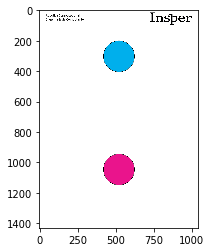

In [113]:
plt.imshow(img_rgb)

In [105]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#ff0e00',
    disabled=False
)

#003d8e

In [107]:
colorpicker

In [138]:
hsv1, hsv2 = aux.ranges(colorpicker.value)

In [119]:
hsv1_M = np.array([153,  50,  50])

In [120]:
hsv2_M = np.array([163, 255, 255])

In [130]:
hsv1_B = np.array([88, 50, 50])

In [133]:
hsv2_B = np.array([ 98, 255, 255])

In [124]:
mask1 = cv2.inRange(img_hsv, hsv1_M, hsv2_M)

In [134]:
mask2 = cv2.inRange(img_hsv, hsv1_B, hsv2_B)

In [135]:
mask = cv2.bitwise_or(mask1, mask2)

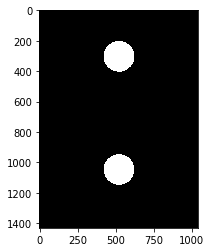

In [136]:
plt.imshow(mask, cmap="Greys_r")

## Parte 3

Assumindo que a folha se mantém sempre paralela ao plano de imagem da câmera, imprima a distância entre a folha e sua câmera

## Parte 4

Trace uma linha entre os centros do círculo magenta e do círculo ciano.

Imprima na tela o ângulo entre esta linha e a horizontal

## Parte 5

Baseado nos círculos encontrados pela transformada de Hough, desenhe um círculo sobre o círculo ciano e outro sobre o círculo magenta.

Dica: Use a função `cv2.circle` e veja o exemplo [draw_circles_video.py](draw_circles_video.py).

**Desafio bônus**: ser capaz de eliminar circulos espúrios (aqueles que não são os da folha)

## Parte 6

Usando um detector de features `BRISK`, identifique o escrito *Insper* na folha. Veja os exemplos [no notebook](BRISK%20Features.ipynb) e em [em código](features.py) .